<span style='font-size: 2.0em'><b>Processamento de Linguagem Natural 🤖</b></span><br/>

    
<span style='font-size: 1.0em'><b>Rafael Vieira - RU: 3534345 - Ciência de Dados<b></span>
</p>

## 💻🗒️  Composição do Notebook:
<table align="left" class='dashed-box'>

<tr style="background-color: white !important">
<td>
    
    
<b><i> 1 - Introdução:</i></b> Definição breve do trabalho

<b><i>2 - Informações sobre os dados:</i></b> Obtenção e triagem exploratória inicial
    
<b><i>3 - Pré-Processamento:</i></b> Construção do algoritmo utilizando a biblioteca NLTK

<b><i>4 - Visualização dos dados :</i></b> Construção de Word Cloud (Nuvens de palavras) 
    
<b><i>5 - Modelo Classificatório:</i></b> Proposta de arquitetura de rede neural para classificação dos dados;
        
<b><i>6 - Arquitetura da rede neural utilizada :</i></b> Apresentação da arquitetura para classificação das notícias 
    
<b><i>6 - Gráficos de desempenho do modelo:</i></b> tabela que estabelece estatísticas relevantes aos gols marcados na copa;
    
<b><i>7 - Discussão final:</i></b> Apresentação das considerações finais
</td>
    <td></td>
</tr>
</table><br/><br/><br/><br


### 🚦 1 - Introdução 
Este notebook contempla a resolução do trabalho final da disciplina de **Natural Processing Learning**, ofertada pela UNINTER. A proposta de tal atividade é realizar uma análise de sentimento visando a construção de um modelo classificatório utilizando uma arquitetura de rede neural artificial, que permita inserir o rótulo adequado a um documento, categorizando-o em *notícia fake* ou *real*
</p>

#### 🖥  Escopo do trabalho

Com a busca do termo "Fake News" no Google, encontra-se a seguinte publicação para o tema:
"Fake News são notícias falsas publicadas por veículos de comunicação como se fossem informações reais. Esse tipo de texto, em sua maior parte, é feito e divulgado com o objetivo de legitimar um ponto de vista ou prejudicar uma pessoa ou grupo (geralmente figuras públicas).

As Fake News têm um grande poder viral, isto é, espalham-se rapidamente. As informações falsas apelam para o emocional do leitor/espectador, fazendo com que as pessoas consumam o material “noticioso” sem confirmar se é verdade seu conteúdo.

O poder de persuasão das Fake News é maior em populações com menor escolaridade e que dependem das redes sociais para obter informações. No entanto, as notícias falsas também podem alcançar pessoas com mais estudo, já que o conteúdo está comumente ligado ao viés político."

Veja mais sobre "O que são Fake News?" em: https://brasilescola.uol.com.br/curiosidades/o-que-sao-fake-news.htm

##### 📚 Importação das bibliotecas principais

In [7]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
import os
import warnings
warnings.filterwarnings('ignore')

### 💾 2 - Dados

<table align="left" class='dashed-box'>
<td>🚨</td>
<td>O corpus utilizado para este trabalho foi retirado de https://github.com/roneysco/Fake.br-Corpus, chamado de FAKEBR, com 7200 amostras, divididas igualmente entre notícias reais e fakes</td>
</table>

#### 2.1 - Abertura dos dados

In [2]:
files_neg = os.listdir(r'C:\Users\PC\Desktop\Fake.br-Corpus-master\full_texts\fake')

In [3]:
endereco_fake = []
path = r'C:\Users\PC\Desktop\Fake.br-Corpus-master\full_texts\fake'
for f in files_neg:
    a = os.path.join(path, f)
    endereco_fake.append(a)

In [4]:
endereco_true = []
path = r'C:\Users\PC\Desktop\Fake.br-Corpus-master\full_texts\true'
for f in files_neg:
    a = os.path.join(path, f)
    endereco_true.append(a)

In [ ]:
### juntando os arquivos txt.

In [5]:
files_neg = [open(f, 'r', encoding="utf8").read() for f in endereco_fake]
files_pos = [open(f, 'r', encoding="utf8").read() for f in endereco_true]

#### 2.2 - Visualizando os dados como foram baixados

In [6]:
files_neg[0]

'Kátia Abreu diz que vai colocar sua expulsão em uma moldura, mas não para de reclamar.\t\n\nA senadora Kátia Abreu (sem partido-TO) disse que sua expulsão do PMDB foi resultado de uma ação da cúpula atual da legenda que, segundo ela, é oportunista.\n\n“Amanhã eu vou botar numa moldura dourada a minha expulsão, porque das mãos de onde veio, é um atestado de boa conduta para o meu currículo. Essas pessoas que me expulsaram não servem ao país. Eles se servem do país em seus benefícios próprios”, disse Kátia Abreu.\n\nUé, mas se a expulsão é algo tão bom para seu currículo, por que tanta choradeira, Kátia?\n\nSabemos o motivo. Provavelmente Kátia não tem valor para o PT, partido que já deveria tê-la absorvido. Ao que parece o PT gostava de Kátia somente se ela ficasse entrincheirada dentro do PMDB.\n\nOu seja, isso é se rebaixar demais. Resta a Kátia ficar chorando as pitangas por todos os cantos.\n\nEm tempo: até o momento o PT não cadastrou Kátia Abreu em suas fileiras. Que situação pat

In [7]:
files_pos[0]

'\ufeffO Podemos decidiu  expulsar o deputado federal Carlos Gaguim do partido após a Polícia Federal fazer buscas a apreensões no gabinete dele na Câmara. Com isso, a legenda abre espaço para receber a senadora expulsa pelo PMDB, Katia Abreu. Por meio de nota, a legenda informou que o afastamento do parlamentar já era algo acordado entre os filiados da sigla.  “Ainda que o parlamentar tenha comunicado a conclusão de sua desfiliação para esta semana, diante dos fatos noticiados hoje, a Executiva Nacional do Podemos solicita o imediato cancelamento de sua filiação dos quadros do partido”.\n\nO partido, que no passado chegou a cogitar lançar o parlamentar como candidato ao Senado, diz que “apoia a investigação com a ampla apuração dos eventuais crimes cometidos e a consequente responsabilização dos envolvidos, para que todos sejam punidos com o máximo rigor da Lei, independentemente de posição ou cargo ocupado”. '

#### 👍 2.3 - Quantidade de palavras no corpos positivo

In [34]:
all_words = []
documents = []
documents_clean = []

from nltk.corpus import stopwords
import re
for p in files_pos:
    documents.append( p )

In [36]:
len(documents)

3600

In [37]:
valores = []
for i in range(len(documents)):
    a = len(documents[i])
    valores.append(a)

#####  2.4 -  Quantidade de palavras no conjunto de dados positivos

In [39]:
sum(valores)

24025260

<table align="left" class='dashed-box'>
<td>🚨</td>
    <td>O valor de <b>24.025.260</b> é da quantidade de palavras na classe POSITIVA (sem quaisquer processamentos)</td>
</table>

#### 👎🏽 2.4 - Quantidade de palavras no corpos negativo

In [40]:
all_words = []
documents2 = []
documents_clean = []

from nltk.corpus import stopwords
import re
for p in files_neg:
    documents2.append( p )

In [42]:
valores2 = []
for i in range(len(documents2)):
    a = len(documents2[i])
    valores2.append(a)

### Quantidade de palavras nba classe negativa - sem nenhum tratamento

In [43]:
sum(valores2)

4046865

<table align="left" class='dashed-box'>
<td>🚨</td>
    <td>O valor de <b>4.046.865</b> é da quantidade de palavras na classe NEGATIVA (sem quaisquer processamentos)</td>
</table>

### 🧹 3 - PRÉ-PROCESSAMENTO DOS DADOS

#### 3.1 - Criação de função que faz a limpeza dos dados - utilizando a regex

In [74]:
def clean_str(string):
#     string = re.sub(r"[^A-Za-z0-9(),!?]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\ç", "c", string)
    string = re.sub(r"\é", "e", string)
    string = re.sub(r"\í", "i", string)
    string = re.sub(r"\ão", "ao", string)
    string = re.sub(r"\ç", "c", string)
    string = re.sub(r"\é", "e", string)
    string = re.sub(r"\í", "i", string)
    string = re.sub(r"\ão", "ao", string)
    string = re.sub(r"\á", "a", string)
    string = re.sub(r"\\", "", string)
    string = re.sub(r"\n", " ", string)
    string = re.sub(r"\â", "a", string)
    string = re.sub(r"\ufeffO", " ", string)
    string = re.sub(r"\n\nO", " ", string)
    string = re.sub(r"\ó", "o", string)
    string = re.sub(r"\õ", "o", string)
    string = re.sub(r"\ã", "a", string)
    string = re.sub(r"\à", "a", string)
    string = re.sub(r"\ê", "e", string)
    string = re.sub(r"\\t\n\n", "", string)

    cleanr = re.compile('<.*?>')

    string = re.sub(r'\d+', '', string)
    string = re.sub(cleanr, '', string)
    string = re.sub("'", '', string)
    string = re.sub(r'\W+', ' ', string)
    string = string.replace('_', '')
    


    return string.strip().lower()

#### 3.2 - Algoritmo utilizado para processamento dos dados

#### 💻🗒️  Sugestão do processamento do corpora:
<table align="left" class='dashed-box'>

<tr style="background-color: white !important">
<td>
    
    
<b><i> 1 - Stopwords:</i></b> Serão retirar as stopwords utilizando o framework NLTK (portuguese)

<b><i>2 - Limpeza dos dados:</i></b> Utilizada a função exposta no item 3.1, que visa a retira de pontuações e caracteres dispensáveis
    
<b><i>3 - Tokenização:</i></b> Realização da Tokenização de cada palavra

</td>
    <td></td>
</tr>
</table><br/><br/><br/><br


In [106]:
all_words = []
documents = []
documents_clean = []

identificacao = 'Rafael Vieira - RU: 3534345' 

from nltk.corpus import stopwords
import re

stop_words = list(set(stopwords.words('portuguese')))

for p in files_pos:
    
    documents.append( (p, "pos") )
    
    cleaned = clean_str(p)
    
    documents_clean.append( (cleaned, "pos") )
    
    
    # tokenize 
    tokenized = word_tokenize(cleaned)
    
    # remove stopwords 
    stopped = [w for w in tokenized if not w in stop_words]
    
    # parts of speech tagging for each word 
    pos = nltk.pos_tag(stopped)
    
    # make a list of  all adjectives identified by the allowed word types list above
    for w in pos:
#         if w[1][0] in allowed_word_types:
        all_words.append(w[0].lower())

for p in files_neg:
# for p in files_neg:
    # create a list of tuples where the first element of each tuple is a review
    # the second element is the label
    documents.append( (p, "neg") )
    
    # remove punctuations
#     cleaned = re.sub(r'[^(a-zA-Z)\s]','', p)
    cleaned = clean_str(p)
    documents_clean.append( (cleaned, "neg") )
    # tokenize 
    tokenized = word_tokenize(cleaned)
    
    # remove stopwords 
    stopped = [w for w in tokenized if not w in stop_words]
    
    # parts of speech tagging for each word 
    neg = nltk.pos_tag(stopped)
    
    # make a list of  all adjectives identified by the allowed word types list above
    for w in neg:
#         if w[1][0] in allowed_word_types:
        all_words.append(w[0].lower())
print('###############################')
print(f'#', identificacao, '#')
print('###############################')

###############################
# Rafael Vieira - RU: 3534345 #
###############################


In [69]:
len(documents)

7200

#### 🧼 3.3 - Remocao das stopwords e pré-processamento dos dados

In [90]:
len(all_words)

2715256

<table align="left" class='dashed-box'>
<td>🚨</td>
    <td>Com o pré-processamento proposto obteve-se um conjunto de palavras no valor de <b>2.715.256</br> </td>
</table>

In [10]:
### separação das palavras em positivas e negativas

In [114]:
pos_A = []
for w in pos:
    
    pos_A.append(w[0].lower())

pos_N = []
for w in neg:
    pos_N.append(w[0].lower())

#### ➗ 3.4 - Verificação da quantidade de documentos para cada classe

In [92]:
import pandas as pd
pd.DataFrame(documents_clean)

,0,1
0,podemos decidiu expulsar o deputado federal ca...,pos
1,bolsonaro e um liberal completo diz presidente...,pos
2,ministro do stf libera andrea neves de prisao ...,pos
3,apesar da abundancia cresce preocupacao com pr...,pos
4,por que harvard e mit levarao dilma moro e sup...,pos
...,...,...
7195,ft o julgamento de um populista que usou dinhe...,neg
7196,nota fiscal emitida pela petrobras mostra que ...,neg
7197,estao estancando a sangria da lava jato bem de...,neg
7198,rj cidadao finge estar possuido pela pomba gir...,neg


#### 🔎🕵🏻 3.5 - Comparacao do texto sem processamento versus com processamento

In [107]:
documents[2][0]

'Ministro do STF libera Andrea Neves de prisão domiciliar\n\nDecisão de Marco Aurélio Mello vale para irmã de Aécio Neves e também para Frederico Pacheco, primo do senador, e Mendherson Souza Lima, ex-assessor parlamentar de Zeze Perrella.\n\nO ministro do Supremo Tribunal Federal (STF) Marco Aurélio Mello liberou Andrea Neves, irmã do senador Aécio Neves (PSDB-MG), da prisão domiciliar e do uso de tornozeleira eletrônica. A decisão também vale para Frederico Pacheco, primo do senador, e Mendherson Souza Lima, ex-assessor parlamentar do senador Zeze Perrella (PMDB-MG).\n\nPublicada nesta quarta-feira (6), a decisão retira ainda as outras medidas cautelares impostas a eles, como a proibição de sair do país, a obrigação de entrega do passaporte, e a restrição de manter contato com os demais investigados, entre eles Aécio Neves.\n\nAndrea, Frederico e Mendherson são investigados junto com Aécio por suposta prática de corrupção, organização criminosa e embaraço às investigações da Lava Jat

In [108]:
documents_clean[2][0]

'ministro do stf libera andrea neves de prisao domiciliar decisao de marco aurelio mello vale para irma de aecio neves e tambem para frederico pacheco primo do senador e mendherson souza lima ex assessor parlamentar de zeze perrella o ministro do supremo tribunal federal stf marco aurelio mello liberou andrea neves irma do senador aecio neves psdb mg da prisao domiciliar e do uso de tornozeleira eletrônica a decisao tambem vale para frederico pacheco primo do senador e mendherson souza lima ex assessor parlamentar do senador zeze perrella pmdb mg publicada nesta quarta feira a decisao retira ainda as outras medidas cautelares impostas a eles como a proibicao de sair do pais a obrigacao de entrega do passaporte e a restricao de manter contato com os demais investigados entre eles aecio neves andrea frederico e mendherson sao investigados junto com aecio por suposta pratica de corrupcao organizacao criminosa e embaraco as investigacoes da lava jato eles ja foram denunciados andrea neves 

<table align="left" class='dashed-box'>
<td>🚨</td>
    <td>IMPORTANTE OBSERVAR QUE HOUVE UMA MUDANÇA EXPRESSIVA NA CONFIGURAÇÃO DO TEXTO, 
    NAO HÁ MAIS ACENTUAÇÃO E NEM CARACTERES ESPECIAIS OU ACENTUAÇÕES
</td>
</table>

#### 👨🏽‍💻 3.6 - Exploração dos após o tratamento dos dados

In [109]:
docs = pd.DataFrame(documents_clean)
docs.head(2)

,0,1
0,podemos decidiu expulsar o deputado federal ca...,pos
1,bolsonaro e um liberal completo diz presidente...,pos


In [110]:
positivos = docs.loc[docs[1]== 'pos']
positivos

,0,1
0,podemos decidiu expulsar o deputado federal ca...,pos
1,bolsonaro e um liberal completo diz presidente...,pos
2,ministro do stf libera andrea neves de prisao ...,pos
3,apesar da abundancia cresce preocupacao com pr...,pos
4,por que harvard e mit levarao dilma moro e sup...,pos
...,...,...
3595,para jornal britanico acao contra lula na lava...,pos
3596,temer diz que acionou pf e cade para investiga...,pos
3597,os obstaculos politicos de temer em especialis...,pos
3598,sexta feira de setembro de boa noite aqui esta...,pos


In [111]:
negativos = docs.loc[docs[1]!= 'pos']
negativos

,0,1
3600,katia abreu diz que vai colocar sua expulsao e...,neg
3601,dr ray peita bolsonaro chama o de conservador ...,neg
3602,reinaldo azevedo desmascarado pela policia fed...,neg
3603,relatorio assustador do bndes mostra dinheiro ...,neg
3604,radialista americano fala sobre o pt eles vend...,neg
...,...,...
7195,ft o julgamento de um populista que usou dinhe...,neg
7196,nota fiscal emitida pela petrobras mostra que ...,neg
7197,estao estancando a sangria da lava jato bem de...,neg
7198,rj cidadao finge estar possuido pela pomba gir...,neg


### 📊 4 - Visualização dos dados

<table align="left" class='dashed-box'>
<td>🚨</td>
    <td>Utilizou-se o framework NLTK para obtenção da frequência de distribuição das palavras
</td>
</table>

In [119]:
# creating a frequency distribution of each adjectives. 
BOW = nltk.FreqDist(all_words)
BOW

FreqDist({'nao': 42213, 'presidente': 16905, 'ex': 12128, 'lula': 11894, 'tambem': 11103, 'sao': 10969, 'disse': 10390, 'sobre': 9438, 'anos': 9292, 'ja': 9074, ...})

In [120]:
lista_keys = list(BOW.keys())

In [121]:
len(lista_keys)

81714

In [122]:
lista_values = list(BOW.values())

In [124]:
len(lista_values)

81714

In [125]:
df = pd.DataFrame(lista_keys)
df['quantidade'] = lista_values

In [126]:
df.rename(columns = {0: 'palavra'}, inplace=True)

In [127]:
df = df.sort_values(by=['quantidade'], ascending=False)

In [128]:
df

,palavra,quantidade
99,nao,42213
79,presidente,16905
221,ex,12128
2415,lula,11894
129,tambem,11103
...,...,...
54067,ragubento,1
54063,questionda,1
54062,guarabyra,1
54061,assar,1


In [129]:
text2 = " ".join(all_words)

In [130]:
len(text2)

20852335

In [14]:
## outra maneira de se obter a quantidade de palavras...

In [131]:
from collections import Counter
word_could_dict=Counter(all_words)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

In [134]:
# word_could_dict

In [133]:
pd.DataFrame.from_dict(word_could_dict, orient='index').sort_values(0, ascending=False)[:20]
# df2.sort_values('TF-IDF', ascending=False)

,0
nao,42213
presidente,16905
ex,12128
lula,11894
tambem,11103
sao,10969
disse,10390
sobre,9438
anos,9292
ja,9074


#### ☁️🌨️  4.1 - Nuvem de palavras aplicada a toda as palavras do corpora

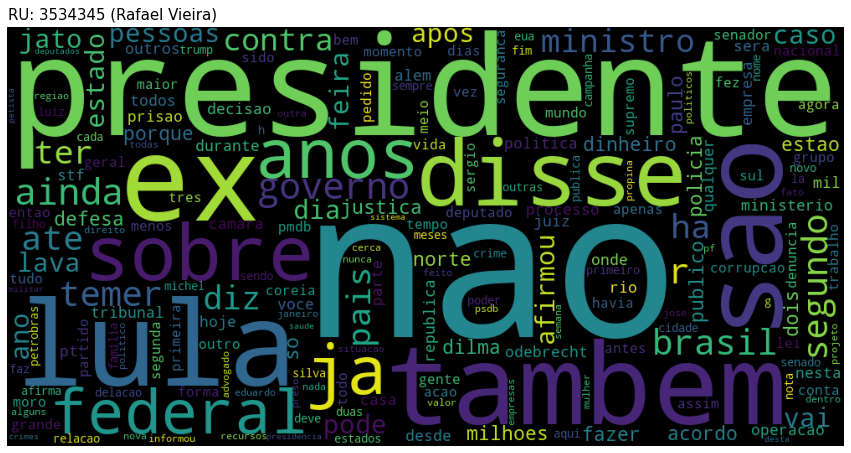

In [135]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.text(0.1, -10.4, 'RU: 3534345 (Rafael Vieira)', fontsize=15, color='Black')
#plt.show()
# plt.savefig('yourfile.png', bbox_inches='tight')
plt.show()

#### ☁️ 4.2 -  Nuvem de Palavras no conjunto de dados POSITIVO (TRUE)

In [136]:
from collections import Counter
word_could_dict_posA=Counter(pos_A)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict_posA)

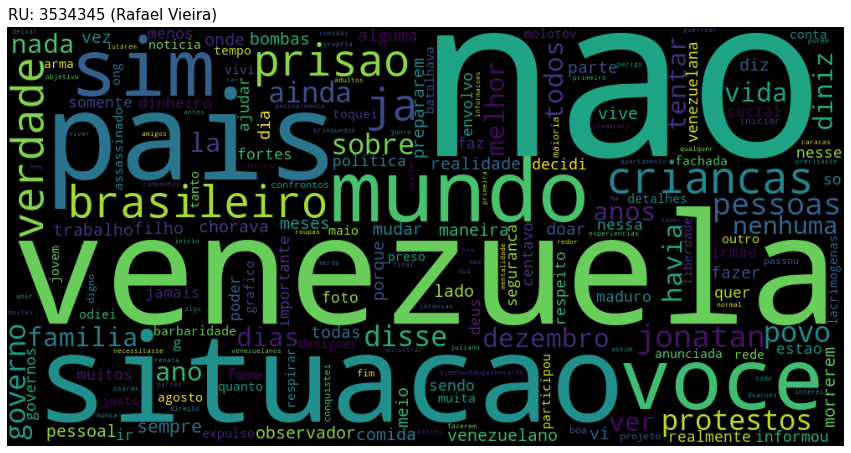

In [137]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.text(0.1, -10.4, 'RU: 3534345 (Rafael Vieira)', fontsize=15, color='Black')
#plt.show()
# plt.savefig('yourfile.png', bbox_inches='tight')
plt.show()

In [138]:
maiores_palavras_positivas = pd.DataFrame.from_dict(word_could_dict_posA, orient='index').sort_values(0, ascending=False)[:20]
maiores_palavras_positivas.head(4)

,0
nao,32
venezuela,17
voce,10
pais,10


In [139]:
maiores_palavras_positivas.reset_index(inplace=True)

In [140]:
maiores_palavras_positivas.head(3)

,index,0
0,nao,32
1,venezuela,17
2,voce,10


#### 📈 4.3 -Distribuição das 20 primeiras maiores palavras no conjunto de dados positivos?

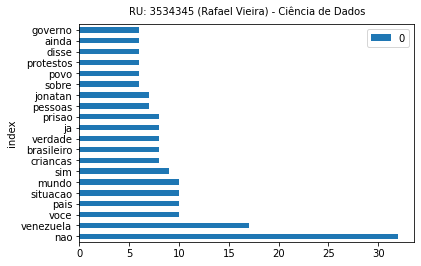

In [141]:
ax = maiores_palavras_positivas.plot.barh(x='index', y=0, rot=0)
plt.text(5, 20.4, 'RU: 3534345 (Rafael Vieira) - Ciência de Dados', fontsize=10, color='Black')
plt.show()

#### ☁️ 4.3 -  Nuvem de Palavras no conjunto de dados NEGATIVOS (FAKE)

In [142]:
from collections import Counter
word_could_dict_NEG=Counter(pos_N)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict_NEG)

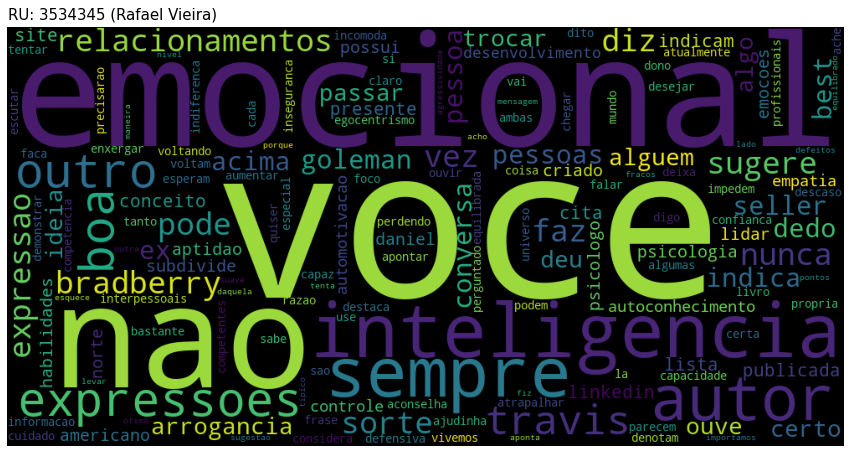

In [143]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.text(0.1, -10.4, 'RU: 3534345 (Rafael Vieira)', fontsize=15, color='Black')
#plt.show()
# plt.savefig('yourfile.png', bbox_inches='tight')
plt.show()

In [144]:
maiores_palavras_fakes = pd.DataFrame.from_dict(word_could_dict_NEG, orient='index').sort_values(0, ascending=False)[:20]
maiores_palavras_fakes.head(4)

,0
voce,14
emocional,8
nao,7
inteligencia,6


In [145]:
maiores_palavras_fakes.reset_index(inplace=True)

#### 📈 4.3 -Distribuição das 20 primeiras maiores palavras no conjunto de dados negativos (fake)?

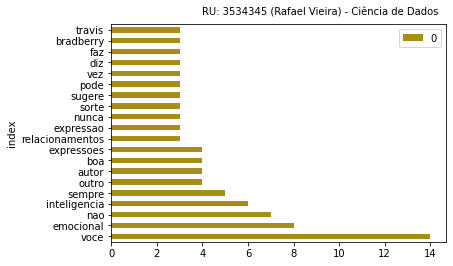

In [146]:
ax = maiores_palavras_fakes.plot.barh(x='index', y=0, rot=0, color = '#a98d19')
plt.text(4, 20.4, 'RU: 3534345 (Rafael Vieira) - Ciência de Dados', fontsize=10, color='Black')
plt.show()

### 5 - Abordagens TF-IDF

In [3]:
import pandas as pd
arquivo = pd.read_csv('arquivo_redes_neurais.csv')

In [4]:
# arquivo = pd.DataFrame(documents_clean)
arquivo.rename(columns = {'0': 'frases', '1': 'label'}, inplace=True)
pd.set_option('display.max_colwidth',None)
arquivo.head(1)

,frases,label
0,podemos decidiu expulsar o deputado federal carlos gaguim do partido apos a policia federal fazer buscas a apreensoes no gabinete dele na camara com isso a legenda abre espaco para receber a senadora expulsa pelo pmdb katia abreu por meio de nota a legenda informou que o afastamento do parlamentar ja era algo acordado entre os filiados da sigla ainda que o parlamentar tenha comunicado a conclusao de sua desfiliacao para esta semana diante dos fatos noticiados hoje a executiva nacional do podemos solicita o imediato cancelamento de sua filiacao dos quadros do partido o partido que no passado chegou a cogitar lancar o parlamentar como candidato ao senado diz que apoia a investigacao com a ampla apuracao dos eventuais crimes cometidos e a consequente responsabilizacao dos envolvidos para que todos sejam punidos com o maximo rigor da lei independentemente de posicao ou cargo ocupado,pos


In [5]:
len(arquivo)

7200

In [6]:
corpus = []
for i in arquivo['frases']:
    corpus.append(i)

In [7]:
len(corpus)

7200

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, smooth_idf=True, use_idf=True)

In [9]:
X = vectorizer.fit_transform(corpus)

In [10]:
names = vectorizer.get_feature_names()
# names

/Users/rafaelvieira/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### 🔖  5.1 - TF-IDF da colecao toda

In [11]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(corpus)
df_doc = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df_doc = df_doc.sort_values('TF-IDF', ascending=False)
df_doc.head(3)

,TF-IDF
parlamentar,0.237852
legenda,0.205777
partido,0.195085


#### 🔖  5.2 - TF-IDF da classe positiva

In [12]:
positivo = arquivo.loc[arquivo['label']=='pos']
positivo.head(1)

,frases,label
0,podemos decidiu expulsar o deputado federal carlos gaguim do partido apos a policia federal fazer buscas a apreensoes no gabinete dele na camara com isso a legenda abre espaco para receber a senadora expulsa pelo pmdb katia abreu por meio de nota a legenda informou que o afastamento do parlamentar ja era algo acordado entre os filiados da sigla ainda que o parlamentar tenha comunicado a conclusao de sua desfiliacao para esta semana diante dos fatos noticiados hoje a executiva nacional do podemos solicita o imediato cancelamento de sua filiacao dos quadros do partido o partido que no passado chegou a cogitar lancar o parlamentar como candidato ao senado diz que apoia a investigacao com a ampla apuracao dos eventuais crimes cometidos e a consequente responsabilizacao dos envolvidos para que todos sejam punidos com o maximo rigor da lei independentemente de posicao ou cargo ocupado,pos


#### 🔖  5.3 - TF-IDF da colecao toda

In [13]:
corpus_positivo = []
for i in positivo['frases']:
    corpus_positivo.append(i)

In [14]:
len(corpus_positivo)

3600

In [15]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(corpus_positivo)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
# print (df.head(25))

/Users/rafaelvieira/opt/anaconda3/envs/my-rdkit-env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
# df.reset_index(inplace=True)
df[:3]

,TF-IDF
parlamentar,0.236079
legenda,0.203731
gaguim,0.198798


In [17]:
!pip install plotly

#### 💹 5.4 - Visualizacao das distribuicoes de TD-IDF nas 20 primeiras palavras de maiores scores (classe positiva)

In [19]:
df.head(3)

,TF-IDF
parlamentar,0.236079
legenda,0.203731
gaguim,0.198798


In [33]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

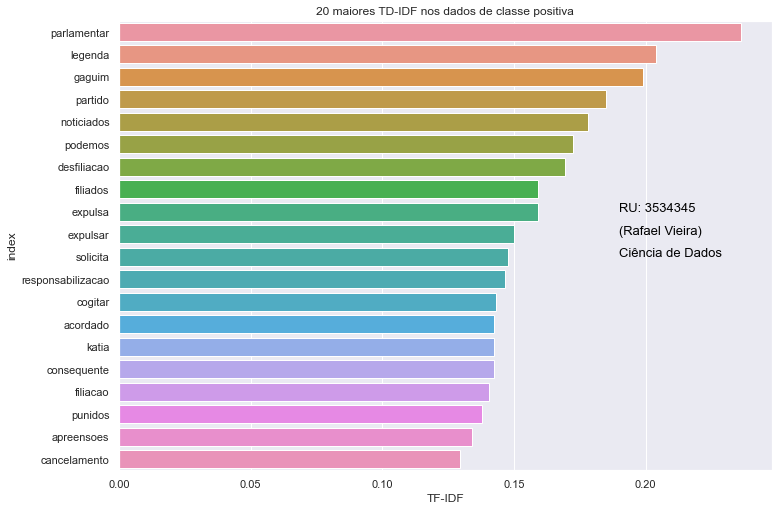

In [40]:
# plotando o mesmo gráfico, mas na horizontal para um melhor entendimento
import seaborn as sns
import matplotlib.pyplot as plt
# df.reset_index(inplace=True)
# from PIL import Image
sns.barplot(data=df[0:20], x='TF-IDF', y='index')
plt.text(0.19, 8, 'RU: 3534345', fontsize=13, color='Black')
plt.text(0.19, 9, '(Rafael Vieira)', fontsize=13, color='Black')
plt.text(0.19,10, 'Ciência de Dados', fontsize=13, color='Black')

plt.title('20 maiores TD-IDF nos dados de classe positiva')
plt.show()

#### 5.5 -  TF_IDF para as classes positivas e negativas

In [41]:
negativo = arquivo.loc[arquivo['label']!='pos']
negativo.head(2)

,frases,label
3600,katia abreu diz que vai colocar sua expulsao em uma moldura mas nao para de reclamar a senadora katia abreu sem partido to disse que sua expulsao do pmdb foi resultado de uma acao da cupula atual da legenda que segundo ela e oportunista amanha eu vou botar numa moldura dourada a minha expulsao porque das maos de onde veio e um atestado de boa conduta para o meu curriculo essas pessoas que me expulsaram nao servem ao pais eles se servem do pais em seus beneficios proprios disse katia abreu ue mas se a expulsao e algo tao bom para seu curriculo por que tanta choradeira katia sabemos o motivo provavelmente katia nao tem valor para o pt partido que ja deveria te la absorvido ao que parece o pt gostava de katia somente se ela ficasse entrincheirada dentro do pmdb ou seja isso e se rebaixar demais resta a katia ficar chorando as pitangas por todos os cantos em tempo ate o momento o pt nao cadastrou katia abreu em suas fileiras que situacao patetica para a ex ministra da agricultura de dilma,neg
3601,dr ray peita bolsonaro chama o de conservador fake em entrevista a danilo gentili e divide a direita este site vem avisando jair bolsonaro que ele deveria abandonar a pauta estatista de vez e fazer um discurso mais convincente para aquela boa parte dos liberais e conservadores do brasil que querem se ver livres das amarras estatais tudo bem que as pesquisas ainda dizem que a maior parte do povo e contra as privatizacoes mas o indice pouco mais de do povo e facil de ser revertido ademais bolsonaro deveria falar para direitistas em vez de focar tanto em petistas arrependidos recentemente ele disse que pensaria vezes antes de privatizar a petrobras para que ela nao caia nas maos de chineses ou algo do tipo deveria ter dito eu garanto a privatizacao da petrobras e tambem garanto que chineses nao irao compra la isso nao deixaria brechas do jeito que ele falou parece que o suposto medo de venda aos chineses e pretexto para evitar a privatizacao seja la como for a direita vai ter que adotar alternativas que foquem em um estado reduzido diminuicao de impostos e venda de estatais alem de joao amoedo dr rey esta fazendo vicejar este tipo de discurso e ainda que sua candidatura esteja em fase inicial e complicado para bolsonaro que aparecam pessoas de direita propondo uma visao economicamente direitista para a economia enfim veja aos dr rey espinafrando bolsonaro quem da brechas nao pode reclamar que os outros aproveitem nao e mesmo,neg


In [42]:
corpus_fake = []
for i in negativo['frases']:
    corpus_fake.append(i)
    
# corpus_true = []
# for i in true['preprocessed_news']:
#     corpus_true.append(i)
    

In [43]:
##TD-IFD - true

In [47]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(corpus_fake)
df2 = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df2 = df2.sort_values('TF-IDF', ascending=False)
# print (df2.head(25))
df2[:3]

,TF-IDF
katia,0.598953
expulsao,0.342676
abreu,0.260187


#### 💹 5.5 - Visualizacao das distribuicoes de TD-IDF nas 20 primeiras palavras de maiores scores (classe negativa)

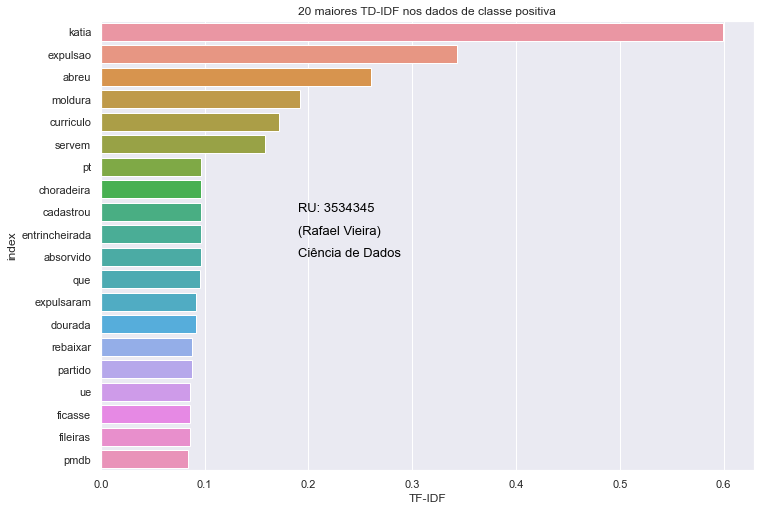

In [49]:
# plotando o mesmo gráfico, mas na horizontal para um melhor entendimento
import seaborn as sns
import matplotlib.pyplot as plt
df2.reset_index(inplace=True)
# from PIL import Image
sns.barplot(data=df2[0:20], x='TF-IDF', y='index')
plt.text(0.19, 8, 'RU: 3534345', fontsize=13, color='Black')
plt.text(0.19, 9, '(Rafael Vieira)', fontsize=13, color='Black')
plt.text(0.19,10, 'Ciência de Dados', fontsize=13, color='Black')

plt.title('20 maiores TD-IDF nos dados de classe positiva')
plt.show()

### 🧠🤖 6 - Criação do modelo de classificação - Usando redes neurais artificiais

In [177]:
arquivo.head(1)

,0,1
0,podemos decidiu expulsar o deputado federal carlos gaguim do partido apos a policia federal fazer buscas a apreensoes no gabinete dele na camara com isso a legenda abre espaco para receber a senadora expulsa pelo pmdb katia abreu por meio de nota a legenda informou que o afastamento do parlamentar ja era algo acordado entre os filiados da sigla ainda que o parlamentar tenha comunicado a conclusao de sua desfiliacao para esta semana diante dos fatos noticiados hoje a executiva nacional do podemos solicita o imediato cancelamento de sua filiacao dos quadros do partido o partido que no passado chegou a cogitar lancar o parlamentar como candidato ao senado diz que apoia a investigacao com a ampla apuracao dos eventuais crimes cometidos e a consequente responsabilizacao dos envolvidos para que todos sejam punidos com o maximo rigor da lei independentemente de posicao ou cargo ocupado,pos


#### 📌 6.1 - Tokenização das palavras

In [181]:
# Tokenizando as 3000 palavras mais frequentes:
from keras.preprocessing.text import Tokenizer
tokenizador = Tokenizer(num_words=3000) # se não informar num_words, ele irá considerar todas
tokenizador.fit_on_texts(arquivo['0'].values)

In [1]:
# Visualizando as palavras mais frequentes
# print(tokenizador.word_index)

In [183]:
# O tokenizador foi criado, mas até aqui nosso dataset ainda não mudou. Iremos criar uma variável X com as palavras tokenizadas:
X = tokenizador.texts_to_sequences(arquivo['0'].values)

In [184]:
# X[2] # Observe como o texto do índice 2 possui 15 palavras

In [185]:
# Verificando o tamanho do texto mais longo:
maximo_comprimento = max(len(i) for i in X)
print(maximo_comprimento)

5659


In [186]:
from keras_preprocessing.sequence import pad_sequences

# Criando lotes de dados temporais, fazendo com que cada amostra tenha o mesmo tamanho:
X = pad_sequences(X)

In [187]:
X[2]

array([  0,   0,   0, ..., 112,   1, 230])

In [188]:
len(X[1])

5659

#### 🖖 6.2 - Separação entre treino e test

In [189]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(arquivo['1']).values # Aplicando one-hot-encoding na variável target 
x_treino, x_teste, y_treino, y_teste = train_test_split(X,Y, test_size = 0.25)
print('Tamanho do treino: ', x_treino.shape, y_treino.shape)
print('Tamanho do teste: ', x_teste.shape, y_teste.shape)

Tamanho do treino:  (5400, 5659) (5400, 2)
Tamanho do teste:  (1800, 5659) (1800, 2)


In [190]:
X.shape[1]

5659

In [191]:
import warnings
warnings.filterwarnings('ignore')

#### 🗂️ 6.3 - Arquitetura proposta para rede neural

In [195]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
import warnings
warnings.filterwarnings('ignore')

# Criando a rede neural temporal:

modelo = Sequential()
modelo.add(Embedding(input_dim=600, output_dim=100, input_length = X.shape[1])) # criando os vetores word embedding. Lembrando que X.shape[1] é o número de palavras que cada amostra tem (907).
modelo.add(LSTM(150, dropout=0.3)) # criando a LSTM (150 neurônios na camada oculta)
modelo.add(Dense(2, activation='softmax')) # definindo a saída com 2 classes
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 6.4 - Sumarização do modelo utilizado.

In [203]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5659, 100)         60000     
_________________________________________________________________
lstm (LSTM)                  (None, 150)               150600    
_________________________________________________________________
dense (Dense)                (None, 2)                 302       
Total params: 210,902
Trainable params: 210,902
Non-trainable params: 0
_________________________________________________________________


<table align="left" class='dashed-box'>
<td>🚨</td>
    <td>A REDE NEURAL IRÁ UTILIZAR <b>210.902</b> PARÂMETROS NO TREINAMENTO
</td>
</table>

#### 6.5 - Desempenho da rede neural

In [196]:
import tensorflow as tf
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [197]:
historico=modelo.fit(x_treino, y_treino, batch_size = 50, epochs = 200, validation_data=(x_teste, y_teste), callbacks=[early_stopping_cb],
                    use_multiprocessing=True, workers=16, max_queue_size=32, verbose =2)

Epoch 1/200
108/108 - 48s - loss: 0.6737 - accuracy: 0.5930 - val_loss: 0.6483 - val_accuracy: 0.6278
Epoch 2/200
108/108 - 44s - loss: 0.5168 - accuracy: 0.7504 - val_loss: 0.3636 - val_accuracy: 0.8972
Epoch 3/200
108/108 - 45s - loss: 0.6186 - accuracy: 0.6487 - val_loss: 0.5976 - val_accuracy: 0.6783
Epoch 4/200
108/108 - 45s - loss: 0.5563 - accuracy: 0.7117 - val_loss: 0.5487 - val_accuracy: 0.6394
Epoch 5/200
108/108 - 47s - loss: 0.5486 - accuracy: 0.7033 - val_loss: 0.5642 - val_accuracy: 0.7311
Epoch 6/200
108/108 - 45s - loss: 0.2107 - accuracy: 0.9319 - val_loss: 0.1419 - val_accuracy: 0.9594
Epoch 7/200
108/108 - 45s - loss: 0.1162 - accuracy: 0.9635 - val_loss: 0.1399 - val_accuracy: 0.9567
Epoch 8/200
108/108 - 45s - loss: 0.1032 - accuracy: 0.9654 - val_loss: 0.1618 - val_accuracy: 0.9489
Epoch 9/200
108/108 - 44s - loss: 0.0863 - accuracy: 0.9689 - val_loss: 0.1337 - val_accuracy: 0.9594
Epoch 10/200
108/108 - 45s - loss: 0.0878 - accuracy: 0.9689 - val_loss: 0.1357 - 

### Acurácia:
<table align="left" class='dashed-box'>
<td>📌 </td>
    <td>O ACURÁCIA NO CONJUNTO DE TREINAMENTO FOI DE:  <span style='font-size: 1.6em'><b>0.9863 <b></span>
</td>
</table>


In [17]:
# Treinando o modelo:
# modelo.fit(x_treino, y_treino, batch_size = 50, epochs = 10, verbose = 2)

In [198]:
y_teste

array([[1, 0],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [199]:
# Testando a performance do modelo nos dados de teste:
__, acuracia = modelo.evaluate(x_teste, y_teste, verbose = 2, batch_size = 50)
print("Acurária com dados de teste: %.2f" % (acuracia))

36/36 - 6s - loss: 0.1292 - accuracy: 0.9589
Acurária com dados de teste: 0.96


        
### Acurácia teste:
<table align="left" class='dashed-box'>
<td>📌 </td>
    <td>O ACURÁCIA NO CONJUNTO DE TREINAMENTO FOI DE:  <span style='font-size: 1.6em'><b>0.96 <b></span>
</td>
</table>

### 📈📈 7 - Visualização gráfica do desempenho do modelo

In [200]:
import pandas as pd
import matplotlib.pyplot as plt

history = pd.DataFrame(historico.history)

In [201]:
# history

Text(0, 0.5, 'Accuracy')

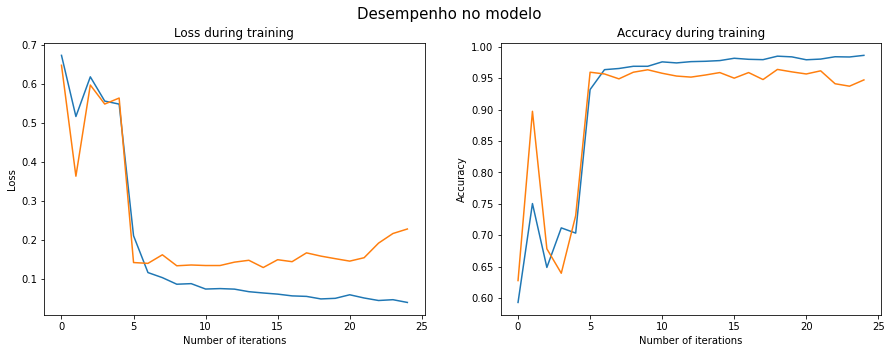

In [202]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Desempenho no modelo', size=15)

axes[0].plot(history[['loss', 'val_loss']])
axes[0].set_title("Loss during training")
axes[0].set_xlabel("Number of iterations")
axes[0].set_ylabel("Loss")

axes[1].plot(history[['accuracy', 'val_accuracy']])
axes[1].set_title("Accuracy during training")
axes[1].set_xlabel("Number of iterations")
axes[1].set_ylabel("Accuracy")

##### 7.1 - Salvando a arquitetura do modelo

In [219]:
tf.keras.utils.plot_model(
    modelo,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### Considerações finais... 🕵🏻🕵🏻🕵🏻

Utilizando uma arquitetura de rede neural LSTM foi possível construir um modelo que com alta acurácia para classificação de notícias, reconhecendo padrões em notícias reais e notícias fake. 
Essa classificação assertiva só foi possível por conta de um pré-tratamento dos textos, retirando palavras e caracteres inconsistentes e permitindo que a rede aprendesse, de maneira rápida, a efetuar com 98% de acurácia a corpora estudada.